In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from utils.dataset_utils import *
from model.model_creation import *
from model.model_train import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

from torch.autograd import Variable





np.random.seed(0)
torch.manual_seed(0)

In [2]:
test_family = 'NonLinearModel_NonLinearTask_DistanceCoefficient'
test_name = 'test8'

In [3]:
import concurrent.futures
import multiprocessing as mp

from generator import *

iterations = 5

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list = []
    score_list = []
    error_list_fedavg = []
    score_list_fedavg = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for error, score, error_fedavg, score_fedavg in executor.map(single_iteration, SEEDS):
                error_list.append(error)
                score_list.append(score)
                error_list_fedavg.append(error_fedavg)
                score_list_fedavg.append(score_fedavg)

In [4]:
err = []
err_std = []
for i in range(0, len(error_list[0])):
    s = 0
    e = []
    for k in error_list:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list[0])):
    s = 0
    e = []
    for k in score_list:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list))
    sc_std.append(np.std(e))

err_s = []
err_s_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedavg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedavg))
    sc_s_std.append(np.std(e))

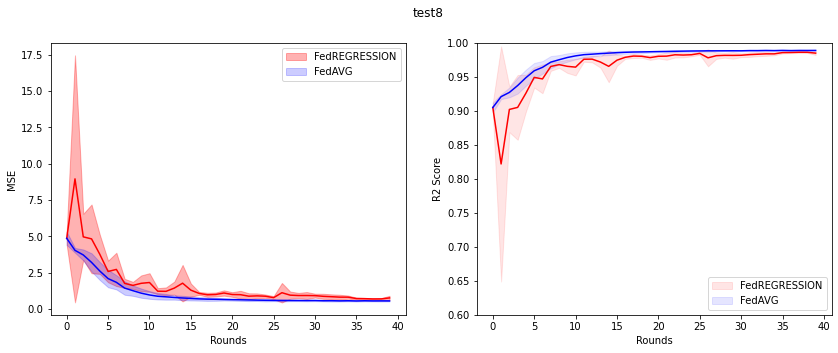

In [5]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(error_list[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


#ax1.set_ylim(ymin=0, ymax=5)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.1)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.1)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")
ax2.set_ylim(ymin=0.6, ymax=1)




plt.draw()

plt.savefig("Results/Stationary/"+test_family+"/plots/"+test_name+"_.svg")

In [6]:
import pandas as pd


d = {'Error_FedREG': err, 
     'Error_FedREG_std': err_std,
     'Score_FedREG': sc, 
     'Score_FedREG_std': sc_std,
     'Error_FedAVG': err_s, 
     'Error_FedAVG_std': err_s_std,
     'Score_FedAVG': sc_s, 
     'Score_FedAVG_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Results/Stationary/"+test_family+"/data/"+test_name+"_.csv", index=False)

In [7]:
pd.read_csv("Results/Stationary/"+test_family+"/data/"+test_name+"_.csv")

,Error_FedREG,Error_FedREG_std,Score_FedREG,Score_FedREG_std,Error_FedAVG,Error_FedAVG_std,Score_FedAVG,Score_FedAVG_std
0,4.864331,0.453890,0.905081,0.007192,4.864331,0.453890,0.905081,0.007192
1,8.956662,8.497706,0.821999,0.173037,4.038859,0.162207,0.921059,0.003567
2,4.967411,1.584304,0.902239,0.033539,3.722017,0.376515,0.927285,0.007248
3,4.827644,2.363164,0.905247,0.047680,3.209871,0.627053,0.937398,0.011767
4,3.764016,1.342781,0.926213,0.027113,2.613956,0.617188,0.948999,0.011848
5,2.585358,0.743944,0.949387,0.014991,2.094354,0.596821,0.959140,0.011509
6,2.726258,1.147561,0.947129,0.021057,1.838289,0.487577,0.964184,0.009262
7,1.765365,0.312287,0.965463,0.006421,1.441666,0.459231,0.971840,0.008955
8,1.628016,0.240975,0.968181,0.004804,1.262996,0.354751,0.975323,0.006932
9,1.770355,0.543202,0.965661,0.009724,1.092705,0.315616,0.978650,0.006173
